## Import Required Libraries

In [16]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module='PIL.Image')


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

## Load Image Data into Arrays

In [17]:
data_train_path = 'Fruits_Vegetables/train'
data_test_path = 'Fruits_Vegetables/test'
data_val_path = 'Fruits_Vegetables/validation'

### Set Image sizes

In [18]:
img_width = 180
img_height =180 

### Load Training Data as Arrays

In [19]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=False)

Found 3115 files belonging to 36 classes.


### Check the different fruits and vegetables we have

In [20]:
data_cat = data_train.class_names

### Load Validation Data as Arrays

In [21]:
data_val = tf.keras.utils.image_dataset_from_directory(
    data_val_path,
    image_size=(img_height, img_width),
    batch_size=32,
    shuffle=True,
    validation_split=False
)

Found 351 files belonging to 36 classes.


### Load Testing Data as Arrays

In [22]:
data_test = tf.keras.utils.image_dataset_from_directory(
    data_test_path,
    image_size=(img_width,img_height),
    batch_size=32,
    shuffle=True,
    validation_split=False
)

Found 359 files belonging to 36 classes.


### Print 9 images with their labels

2024-08-01 11:26:54.720379: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [3115]
	 [[{{node Placeholder/_4}}]]
2024-08-01 11:26:54.721318: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [3115]
	 [[{{node Placeholder/_4}}]]
2024-08-01 11:26:59.563973: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


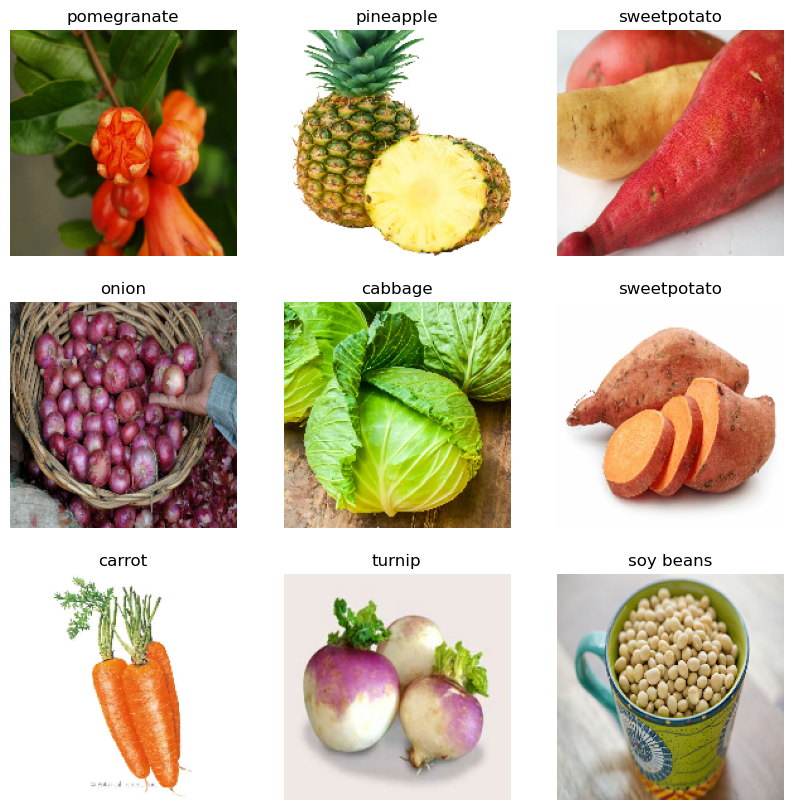

In [23]:
plt.figure(figsize=(10,10))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis('off')

### Build the Sequential Model

In [24]:
from tensorflow.keras.models import Sequential

In [25]:
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3, padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_cat))     
])

### Compile the model

In [26]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [27]:
epochs_size = 25
history = model.fit(data_train, validation_data=data_val, epochs=epochs_size)

Epoch 1/25


2024-08-01 11:38:57.383011: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [3115]
	 [[{{node Placeholder/_4}}]]
2024-08-01 11:38:57.383868: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [3115]
	 [[{{node Placeholder/_4}}]]
2024-08-01 11:39:06.900327: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-08-01 11:39:12.558538: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 1/98 [..............................] - ETA: 34:36 - loss: 3.5298 - accuracy: 0.0312

2024-08-01 11:39:20.343784: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 4/98 [>.............................] - ETA: 8:26 - loss: 5.5286 - accuracy: 0.0234

2024-08-01 11:39:35.097067: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 6/98 [>.............................] - ETA: 8:06 - loss: 5.1627 - accuracy: 0.0312

2024-08-01 11:39:46.210729: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


11/98 [==>...........................] - ETA: 7:02 - loss: 4.4904 - accuracy: 0.0284

2024-08-01 11:40:07.654351: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


14/98 [===>..........................] - ETA: 6:48 - loss: 4.2919 - accuracy: 0.0246

2024-08-01 11:40:24.546964: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-08-01 11:40:24.750528: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


21/98 [=====>........................] - ETA: 5:59 - loss: 4.0452 - accuracy: 0.0283

2024-08-01 11:40:56.251233: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


23/98 [======>.......................] - ETA: 5:50 - loss: 4.0000 - accuracy: 0.0299

2024-08-01 11:41:02.023837: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


28/98 [=======>......................] - ETA: 5:26 - loss: 3.9156 - accuracy: 0.0324

2024-08-01 11:41:26.019608: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


37/98 [==========>...................] - ETA: 4:39 - loss: 3.7963 - accuracy: 0.0448

2024-08-01 11:42:05.380232: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


38/98 [==========>...................] - ETA: 4:35 - loss: 3.7858 - accuracy: 0.0461

2024-08-01 11:42:09.803116: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


44/98 [============>.................] - ETA: 3:59 - loss: 3.7334 - accuracy: 0.0490

2024-08-01 11:42:29.507890: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


47/98 [=============>................] - ETA: 3:40 - loss: 3.7022 - accuracy: 0.0519

2024-08-01 11:42:37.861408: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


54/98 [===============>..............] - ETA: 3:00 - loss: 3.6287 - accuracy: 0.0648

2024-08-01 11:42:58.187306: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


56/98 [================>.............] - ETA: 2:50 - loss: 3.6200 - accuracy: 0.0664

2024-08-01 11:43:02.390516: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


60/98 [=================>............] - ETA: 2:31 - loss: 3.5867 - accuracy: 0.0682

2024-08-01 11:43:14.253386: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


66/98 [===================>..........] - ETA: 2:03 - loss: 3.5396 - accuracy: 0.0691

2024-08-01 11:43:30.755537: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


71/98 [====================>.........] - ETA: 1:41 - loss: 3.5022 - accuracy: 0.0766

2024-08-01 11:43:44.035125: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


73/98 [=====================>........] - ETA: 1:33 - loss: 3.4882 - accuracy: 0.0783

2024-08-01 11:43:49.574782: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


75/98 [=====================>........] - ETA: 1:25 - loss: 3.4777 - accuracy: 0.0804

2024-08-01 11:43:56.400954: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


83/98 [========================>.....] - ETA: 54s - loss: 3.4443 - accuracy: 0.0877

2024-08-01 11:44:16.220773: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - ETA: 0s - loss: 3.3779 - accuracy: 0.1002

2024-08-01 11:44:51.749971: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [351]
	 [[{{node Placeholder/_0}}]]
2024-08-01 11:44:51.754562: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [351]
	 [[{{node Placeholder/_4}}]]
2024-08-01 11:44:56.247161: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-08-01 11:45:02.115103: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:392] Filling up shuffle buffer (this may take a while): 230 of 256
2024-08-01 11:45:03.152476: I tensorflow/core/kerne

98/98 [==============================] - 375s 4s/step - loss: 3.3779 - accuracy: 0.1002 - val_loss: 2.5943 - val_accuracy: 0.2707
Epoch 2/25


2024-08-01 11:45:15.536734: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-08-01 11:45:18.757028: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 1/98 [..............................] - ETA: 13:22 - loss: 2.7786 - accuracy: 0.1250

2024-08-01 11:45:21.096889: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 4/98 [>.............................] - ETA: 4:49 - loss: 2.6532 - accuracy: 0.2031

2024-08-01 11:45:30.144353: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 6/98 [>.............................] - ETA: 4:48 - loss: 2.7515 - accuracy: 0.2135

2024-08-01 11:45:37.031266: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


11/98 [==>...........................] - ETA: 4:15 - loss: 2.7111 - accuracy: 0.2500

2024-08-01 11:45:50.083540: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


14/98 [===>..........................] - ETA: 3:59 - loss: 2.7398 - accuracy: 0.2344

2024-08-01 11:45:58.387013: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-08-01 11:45:58.547069: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


22/98 [=====>........................] - ETA: 3:29 - loss: 2.6587 - accuracy: 0.2457

2024-08-01 11:46:20.846914: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


24/98 [======>.......................] - ETA: 3:24 - loss: 2.6620 - accuracy: 0.2500

2024-08-01 11:46:25.621535: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


28/98 [=======>......................] - ETA: 3:15 - loss: 2.6432 - accuracy: 0.2500

2024-08-01 11:46:38.281678: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


37/98 [==========>...................] - ETA: 2:47 - loss: 2.6160 - accuracy: 0.2525

2024-08-01 11:47:00.394275: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


38/98 [==========>...................] - ETA: 2:45 - loss: 2.6186 - accuracy: 0.2508

2024-08-01 11:47:03.618280: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


44/98 [============>.................] - ETA: 2:28 - loss: 2.5886 - accuracy: 0.2635

2024-08-01 11:47:18.873042: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


47/98 [=============>................] - ETA: 2:22 - loss: 2.5854 - accuracy: 0.2600

2024-08-01 11:47:29.874408: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


52/98 [==============>...............] - ETA: 2:09 - loss: 2.5709 - accuracy: 0.2638

2024-08-01 11:47:45.001126: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


54/98 [===============>..............] - ETA: 2:02 - loss: 2.5666 - accuracy: 0.2622

2024-08-01 11:47:48.302856: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


58/98 [================>.............] - ETA: 1:49 - loss: 2.5560 - accuracy: 0.2624

2024-08-01 11:47:57.430060: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


64/98 [==================>...........] - ETA: 1:31 - loss: 2.5300 - accuracy: 0.2676

2024-08-01 11:48:10.274973: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


69/98 [====================>.........] - ETA: 1:17 - loss: 2.5159 - accuracy: 0.2736

2024-08-01 11:48:22.185819: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


71/98 [====================>.........] - ETA: 1:11 - loss: 2.5086 - accuracy: 0.2764

2024-08-01 11:48:26.558443: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


74/98 [=====================>........] - ETA: 1:03 - loss: 2.5027 - accuracy: 0.2758

2024-08-01 11:48:32.934289: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


81/98 [=======================>......] - ETA: 44s - loss: 2.4857 - accuracy: 0.2793

2024-08-01 11:48:49.040088: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - ETA: 0s - loss: 2.4525 - accuracy: 0.2873

2024-08-01 11:49:25.122263: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-08-01 11:49:30.955336: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:392] Filling up shuffle buffer (this may take a while): 244 of 256
2024-08-01 11:49:31.214487: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:417] Shuffle buffer filled.
2024-08-01 11:49:34.099457: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - 269s 3s/step - loss: 2.4525 - accuracy: 0.2873 - val_loss: 1.7070 - val_accuracy: 0.4843
Epoch 3/25


2024-08-01 11:49:44.079845: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-08-01 11:49:50.057140: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 1/98 [..............................] - ETA: 14:48 - loss: 2.2199 - accuracy: 0.3438

2024-08-01 11:49:51.177965: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 4/98 [>.............................] - ETA: 3:31 - loss: 2.1895 - accuracy: 0.3516

2024-08-01 11:49:58.706850: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 6/98 [>.............................] - ETA: 3:26 - loss: 2.1635 - accuracy: 0.3698

2024-08-01 11:50:02.476294: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


11/98 [==>...........................] - ETA: 3:07 - loss: 2.1053 - accuracy: 0.4034

2024-08-01 11:50:12.382983: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


14/98 [===>..........................] - ETA: 3:03 - loss: 2.0929 - accuracy: 0.3973

2024-08-01 11:50:20.730777: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-08-01 11:50:20.880163: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


21/98 [=====>........................] - ETA: 2:49 - loss: 2.0529 - accuracy: 0.4062

2024-08-01 11:50:37.100593: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


23/98 [======>.......................] - ETA: 2:46 - loss: 2.0659 - accuracy: 0.4049

2024-08-01 11:50:41.129802: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


28/98 [=======>......................] - ETA: 2:37 - loss: 2.0256 - accuracy: 0.4230

2024-08-01 11:50:52.923542: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


36/98 [==========>...................] - ETA: 2:20 - loss: 2.0058 - accuracy: 0.4219

2024-08-01 11:51:11.360000: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


38/98 [==========>...................] - ETA: 2:16 - loss: 2.0119 - accuracy: 0.4178

2024-08-01 11:51:14.812794: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


42/98 [===========>..................] - ETA: 2:08 - loss: 1.9946 - accuracy: 0.4204

2024-08-01 11:51:24.877034: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


46/98 [=============>................] - ETA: 1:59 - loss: 1.9773 - accuracy: 0.4266

2024-08-01 11:51:34.318779: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


52/98 [==============>...............] - ETA: 1:45 - loss: 1.9879 - accuracy: 0.4225

2024-08-01 11:51:48.752199: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


54/98 [===============>..............] - ETA: 1:41 - loss: 1.9945 - accuracy: 0.4207

2024-08-01 11:51:52.339463: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


58/98 [================>.............] - ETA: 1:31 - loss: 1.9908 - accuracy: 0.4176

2024-08-01 11:52:01.588941: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


64/98 [==================>...........] - ETA: 1:17 - loss: 1.9904 - accuracy: 0.4160

2024-08-01 11:52:15.374114: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


69/98 [====================>.........] - ETA: 1:06 - loss: 1.9703 - accuracy: 0.4248

2024-08-01 11:52:27.102742: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


71/98 [====================>.........] - ETA: 1:02 - loss: 1.9709 - accuracy: 0.4247

2024-08-01 11:52:33.125090: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


74/98 [=====================>........] - ETA: 56s - loss: 1.9646 - accuracy: 0.4261

2024-08-01 11:52:41.457418: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


81/98 [=======================>......] - ETA: 40s - loss: 1.9407 - accuracy: 0.4352

2024-08-01 11:53:02.117667: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - ETA: 0s - loss: 1.9157 - accuracy: 0.4385

2024-08-01 11:53:57.389521: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-08-01 11:54:02.129641: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:392] Filling up shuffle buffer (this may take a while): 179 of 256
2024-08-01 11:54:05.260827: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:417] Shuffle buffer filled.
2024-08-01 11:54:08.787486: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - 274s 3s/step - loss: 1.9157 - accuracy: 0.4385 - val_loss: 1.0530 - val_accuracy: 0.7179
Epoch 4/25


2024-08-01 11:55:06.256599: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-08-01 11:55:12.794571: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 1/98 [..............................] - ETA: 18:05 - loss: 1.5291 - accuracy: 0.5000

2024-08-01 11:55:15.335643: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 4/98 [>.............................] - ETA: 5:41 - loss: 1.5799 - accuracy: 0.5547

2024-08-01 11:55:25.420886: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 6/98 [>.............................] - ETA: 5:07 - loss: 1.6625 - accuracy: 0.5260

2024-08-01 11:55:31.798736: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


11/98 [==>...........................] - ETA: 4:46 - loss: 1.6246 - accuracy: 0.5369

2024-08-01 11:55:47.500165: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


14/98 [===>..........................] - ETA: 4:37 - loss: 1.5272 - accuracy: 0.5647

2024-08-01 11:55:59.792946: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-08-01 11:56:00.065077: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


23/98 [======>.......................] - ETA: 4:05 - loss: 1.5062 - accuracy: 0.5611

2024-08-01 11:56:26.388286: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


24/98 [======>.......................] - ETA: 4:04 - loss: 1.5145 - accuracy: 0.5586

2024-08-01 11:56:31.694703: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


28/98 [=======>......................] - ETA: 3:52 - loss: 1.5130 - accuracy: 0.5580

2024-08-01 11:56:46.380920: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


37/98 [==========>...................] - ETA: 3:22 - loss: 1.5187 - accuracy: 0.5591

2024-08-01 11:57:14.563807: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


38/98 [==========>...................] - ETA: 3:18 - loss: 1.5140 - accuracy: 0.5592

2024-08-01 11:57:17.770349: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


44/98 [============>.................] - ETA: 2:58 - loss: 1.4998 - accuracy: 0.5625

2024-08-01 11:57:36.888157: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


47/98 [=============>................] - ETA: 2:48 - loss: 1.5006 - accuracy: 0.5605

2024-08-01 11:57:47.571115: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


54/98 [===============>..............] - ETA: 2:26 - loss: 1.4880 - accuracy: 0.5637

2024-08-01 11:58:11.777949: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


56/98 [================>.............] - ETA: 2:20 - loss: 1.4806 - accuracy: 0.5670

2024-08-01 11:58:18.477260: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


60/98 [=================>............] - ETA: 2:07 - loss: 1.4575 - accuracy: 0.5734

2024-08-01 11:58:32.398658: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


66/98 [===================>..........] - ETA: 1:47 - loss: 1.4219 - accuracy: 0.5862

2024-08-01 11:58:52.527072: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


71/98 [====================>.........] - ETA: 1:30 - loss: 1.4058 - accuracy: 0.5902

2024-08-01 11:59:08.631639: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


73/98 [=====================>........] - ETA: 1:23 - loss: 1.4014 - accuracy: 0.5920

2024-08-01 11:59:15.644251: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


75/98 [=====================>........] - ETA: 1:16 - loss: 1.4002 - accuracy: 0.5933

2024-08-01 11:59:23.250280: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


83/98 [========================>.....] - ETA: 49s - loss: 1.3810 - accuracy: 0.5990

2024-08-01 11:59:44.935680: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - ETA: 0s - loss: 1.3466 - accuracy: 0.6087

2024-08-01 12:00:20.745611: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-08-01 12:00:27.841957: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - 330s 3s/step - loss: 1.3466 - accuracy: 0.6087 - val_loss: 0.6801 - val_accuracy: 0.8405
Epoch 5/25


2024-08-01 12:00:36.197003: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-08-01 12:00:40.294589: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 1/98 [..............................] - ETA: 13:17 - loss: 1.7985 - accuracy: 0.5625

2024-08-01 12:00:41.942657: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 4/98 [>.............................] - ETA: 4:06 - loss: 1.1404 - accuracy: 0.6875

2024-08-01 12:00:50.418615: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 6/98 [>.............................] - ETA: 4:07 - loss: 1.1109 - accuracy: 0.7188

2024-08-01 12:00:55.635635: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


11/98 [==>...........................] - ETA: 3:49 - loss: 1.0597 - accuracy: 0.7102

2024-08-01 12:01:07.997493: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


14/98 [===>..........................] - ETA: 3:39 - loss: 0.9913 - accuracy: 0.7388

2024-08-01 12:01:16.978314: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-08-01 12:01:17.123398: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


21/98 [=====>........................] - ETA: 3:20 - loss: 0.9665 - accuracy: 0.7545

2024-08-01 12:01:36.021761: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


23/98 [======>.......................] - ETA: 3:19 - loss: 0.9346 - accuracy: 0.7649

2024-08-01 12:01:40.035035: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


28/98 [=======>......................] - ETA: 3:03 - loss: 0.9251 - accuracy: 0.7578

2024-08-01 12:01:53.092492: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


37/98 [==========>...................] - ETA: 2:39 - loss: 0.8929 - accuracy: 0.7559

2024-08-01 12:02:16.433755: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


39/98 [==========>...................] - ETA: 2:33 - loss: 0.8745 - accuracy: 0.7604

2024-08-01 12:02:20.321770: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


44/98 [============>.................] - ETA: 2:20 - loss: 0.8666 - accuracy: 0.7578

2024-08-01 12:02:33.825329: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


47/98 [=============>................] - ETA: 2:14 - loss: 0.8687 - accuracy: 0.7547

2024-08-01 12:02:42.543465: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


54/98 [===============>..............] - ETA: 1:55 - loss: 0.8790 - accuracy: 0.7535

2024-08-01 12:03:01.559260: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


56/98 [================>.............] - ETA: 1:50 - loss: 0.8800 - accuracy: 0.7517

2024-08-01 12:03:06.103581: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


60/98 [=================>............] - ETA: 1:40 - loss: 0.8799 - accuracy: 0.7521

2024-08-01 12:03:17.561994: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


66/98 [===================>..........] - ETA: 1:24 - loss: 0.8575 - accuracy: 0.7614

2024-08-01 12:03:33.060728: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


71/98 [====================>.........] - ETA: 1:10 - loss: 0.8510 - accuracy: 0.7601

2024-08-01 12:03:45.834904: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


73/98 [=====================>........] - ETA: 1:05 - loss: 0.8453 - accuracy: 0.7603

2024-08-01 12:03:51.163746: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


75/98 [=====================>........] - ETA: 1:00 - loss: 0.8478 - accuracy: 0.7579

2024-08-01 12:03:56.841224: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


83/98 [========================>.....] - ETA: 38s - loss: 0.8259 - accuracy: 0.7647

2024-08-01 12:04:14.643189: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - ETA: 0s - loss: 0.7772 - accuracy: 0.7769

2024-08-01 12:04:51.333317: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-08-01 12:04:58.285829: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - 274s 3s/step - loss: 0.7772 - accuracy: 0.7769 - val_loss: 0.5781 - val_accuracy: 0.8547
Epoch 6/25


2024-08-01 12:05:11.754876: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-08-01 12:05:17.996805: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 1/98 [..............................] - ETA: 19:25 - loss: 0.4020 - accuracy: 0.8750

2024-08-01 12:05:20.149833: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 4/98 [>.............................] - ETA: 4:06 - loss: 0.5260 - accuracy: 0.8125

2024-08-01 12:05:28.954510: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 6/98 [>.............................] - ETA: 4:02 - loss: 0.5092 - accuracy: 0.8490

2024-08-01 12:05:33.405349: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


11/98 [==>...........................] - ETA: 3:46 - loss: 0.5587 - accuracy: 0.8409

2024-08-01 12:05:45.881605: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


14/98 [===>..........................] - ETA: 3:37 - loss: 0.5407 - accuracy: 0.8438

2024-08-01 12:05:54.622415: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-08-01 12:05:54.773938: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


22/98 [=====>........................] - ETA: 3:17 - loss: 0.5370 - accuracy: 0.8466

2024-08-01 12:06:14.411392: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


24/98 [======>.......................] - ETA: 3:12 - loss: 0.5324 - accuracy: 0.8438

2024-08-01 12:06:20.302098: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


29/98 [=======>......................] - ETA: 3:01 - loss: 0.5439 - accuracy: 0.8384

2024-08-01 12:06:33.260187: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


36/98 [==========>...................] - ETA: 2:43 - loss: 0.5259 - accuracy: 0.8420

2024-08-01 12:06:53.005784: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


37/98 [==========>...................] - ETA: 2:40 - loss: 0.5292 - accuracy: 0.8404

2024-08-01 12:06:56.737104: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


42/98 [===========>..................] - ETA: 2:28 - loss: 0.5267 - accuracy: 0.8393

2024-08-01 12:07:08.285979: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


45/98 [============>.................] - ETA: 2:21 - loss: 0.5290 - accuracy: 0.8375

2024-08-01 12:07:18.860889: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


52/98 [==============>...............] - ETA: 2:01 - loss: 0.5576 - accuracy: 0.8359

2024-08-01 12:07:35.171945: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


54/98 [===============>..............] - ETA: 1:56 - loss: 0.5470 - accuracy: 0.8385

2024-08-01 12:07:40.176467: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


58/98 [================>.............] - ETA: 1:45 - loss: 0.5413 - accuracy: 0.8416

2024-08-01 12:07:50.900462: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


64/98 [==================>...........] - ETA: 1:29 - loss: 0.5225 - accuracy: 0.8491

2024-08-01 12:08:07.112440: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


69/98 [====================>.........] - ETA: 1:16 - loss: 0.5165 - accuracy: 0.8505

2024-08-01 12:08:18.636315: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


71/98 [====================>.........] - ETA: 1:10 - loss: 0.5239 - accuracy: 0.8495

2024-08-01 12:08:23.800150: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


73/98 [=====================>........] - ETA: 1:05 - loss: 0.5197 - accuracy: 0.8510

2024-08-01 12:08:31.153465: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


81/98 [=======================>......] - ETA: 44s - loss: 0.5026 - accuracy: 0.8576

2024-08-01 12:08:49.157367: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - ETA: 0s - loss: 0.4737 - accuracy: 0.8645

2024-08-01 12:09:29.826267: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-08-01 12:09:35.675703: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:392] Filling up shuffle buffer (this may take a while): 224 of 256
2024-08-01 12:09:36.943279: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:417] Shuffle buffer filled.
2024-08-01 12:09:39.925116: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - 278s 3s/step - loss: 0.4737 - accuracy: 0.8645 - val_loss: 0.5212 - val_accuracy: 0.8917
Epoch 7/25


2024-08-01 12:09:49.707984: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-08-01 12:09:56.894543: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 1/98 [..............................] - ETA: 19:18 - loss: 0.6746 - accuracy: 0.8750

2024-08-01 12:09:58.346784: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 5/98 [>.............................] - ETA: 4:09 - loss: 0.5140 - accuracy: 0.8875

2024-08-01 12:10:08.412243: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 6/98 [>.............................] - ETA: 4:10 - loss: 0.4814 - accuracy: 0.8906

2024-08-01 12:10:11.743751: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


10/98 [==>...........................] - ETA: 3:52 - loss: 0.4780 - accuracy: 0.8844

2024-08-01 12:10:21.571368: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


13/98 [==>...........................] - ETA: 3:40 - loss: 0.4673 - accuracy: 0.8870

2024-08-01 12:10:31.249208: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-08-01 12:10:31.443916: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


21/98 [=====>........................] - ETA: 3:22 - loss: 0.4263 - accuracy: 0.8914

2024-08-01 12:10:50.104325: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


22/98 [=====>........................] - ETA: 3:20 - loss: 0.4195 - accuracy: 0.8920

2024-08-01 12:10:55.064490: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


27/98 [=======>......................] - ETA: 3:05 - loss: 0.4115 - accuracy: 0.8924

2024-08-01 12:11:06.855881: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


36/98 [==========>...................] - ETA: 2:41 - loss: 0.4068 - accuracy: 0.8906

2024-08-01 12:11:29.507681: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


37/98 [==========>...................] - ETA: 2:38 - loss: 0.4060 - accuracy: 0.8902

2024-08-01 12:11:33.434627: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


43/98 [============>.................] - ETA: 2:23 - loss: 0.3866 - accuracy: 0.8924

2024-08-01 12:11:47.071462: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


47/98 [=============>................] - ETA: 2:12 - loss: 0.3777 - accuracy: 0.8943

2024-08-01 12:11:57.183872: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


53/98 [===============>..............] - ETA: 1:57 - loss: 0.3828 - accuracy: 0.8956

2024-08-01 12:12:13.229560: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


54/98 [===============>..............] - ETA: 1:54 - loss: 0.3799 - accuracy: 0.8964

2024-08-01 12:12:15.858379: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


57/98 [================>.............] - ETA: 1:47 - loss: 0.3811 - accuracy: 0.8942

2024-08-01 12:12:24.911838: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


63/98 [==================>...........] - ETA: 1:31 - loss: 0.3813 - accuracy: 0.8924

2024-08-01 12:12:41.016654: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


68/98 [===================>..........] - ETA: 1:18 - loss: 0.3770 - accuracy: 0.8952

2024-08-01 12:12:53.094298: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


70/98 [====================>.........] - ETA: 1:13 - loss: 0.3783 - accuracy: 0.8960

2024-08-01 12:12:58.639729: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


72/98 [=====================>........] - ETA: 1:08 - loss: 0.3736 - accuracy: 0.8976

2024-08-01 12:13:06.181136: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


80/98 [=======================>......] - ETA: 47s - loss: 0.3610 - accuracy: 0.9012

2024-08-01 12:13:24.353734: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - ETA: 0s - loss: 0.3473 - accuracy: 0.9059

2024-08-01 12:14:07.900734: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-08-01 12:14:17.582925: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - 279s 3s/step - loss: 0.3473 - accuracy: 0.9059 - val_loss: 0.4146 - val_accuracy: 0.9345
Epoch 8/25


2024-08-01 12:14:29.353964: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-08-01 12:14:34.510166: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 1/98 [..............................] - ETA: 17:58 - loss: 0.3196 - accuracy: 0.9375

2024-08-01 12:14:36.677134: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 4/98 [>.............................] - ETA: 4:12 - loss: 0.3406 - accuracy: 0.9219

2024-08-01 12:14:45.390783: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 6/98 [>.............................] - ETA: 4:07 - loss: 0.3526 - accuracy: 0.9115

2024-08-01 12:14:50.180542: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


11/98 [==>...........................] - ETA: 3:44 - loss: 0.2934 - accuracy: 0.9233

2024-08-01 12:15:02.203183: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


15/98 [===>..........................] - ETA: 3:32 - loss: 0.2916 - accuracy: 0.9187

2024-08-01 12:15:11.679389: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-08-01 12:15:11.852335: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


22/98 [=====>........................] - ETA: 3:14 - loss: 0.2634 - accuracy: 0.9233

2024-08-01 12:15:30.048206: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


23/98 [======>.......................] - ETA: 3:13 - loss: 0.2584 - accuracy: 0.9253

2024-08-01 12:15:35.061708: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


28/98 [=======>......................] - ETA: 3:02 - loss: 0.2886 - accuracy: 0.9196

2024-08-01 12:15:48.004707: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


37/98 [==========>...................] - ETA: 2:39 - loss: 0.2695 - accuracy: 0.9257

2024-08-01 12:16:11.088944: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


38/98 [==========>...................] - ETA: 2:36 - loss: 0.2641 - accuracy: 0.9276

2024-08-01 12:16:15.126505: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


44/98 [============>.................] - ETA: 2:21 - loss: 0.2554 - accuracy: 0.9304

2024-08-01 12:16:28.720810: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


47/98 [=============>................] - ETA: 2:14 - loss: 0.2546 - accuracy: 0.9302

2024-08-01 12:16:38.172014: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


54/98 [===============>..............] - ETA: 1:55 - loss: 0.2506 - accuracy: 0.9294

2024-08-01 12:16:56.465300: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


56/98 [================>.............] - ETA: 1:50 - loss: 0.2512 - accuracy: 0.9297

2024-08-01 12:17:00.837047: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


60/98 [=================>............] - ETA: 1:40 - loss: 0.2624 - accuracy: 0.9318

2024-08-01 12:17:12.301646: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


66/98 [===================>..........] - ETA: 1:24 - loss: 0.2614 - accuracy: 0.9323

2024-08-01 12:17:27.723522: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


71/98 [====================>.........] - ETA: 1:10 - loss: 0.2586 - accuracy: 0.9309

2024-08-01 12:17:40.805830: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


73/98 [=====================>........] - ETA: 1:05 - loss: 0.2715 - accuracy: 0.9298

2024-08-01 12:17:46.101486: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


75/98 [=====================>........] - ETA: 1:00 - loss: 0.2667 - accuracy: 0.9312

2024-08-01 12:17:52.843523: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


83/98 [========================>.....] - ETA: 39s - loss: 0.2673 - accuracy: 0.9296

2024-08-01 12:18:11.340471: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - ETA: 0s - loss: 0.2611 - accuracy: 0.9310

2024-08-01 12:18:48.355717: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-08-01 12:18:57.083668: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - 278s 3s/step - loss: 0.2611 - accuracy: 0.9310 - val_loss: 0.2972 - val_accuracy: 0.9516
Epoch 9/25


2024-08-01 12:19:07.328381: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-08-01 12:19:14.679732: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 1/98 [..............................] - ETA: 20:56 - loss: 0.0926 - accuracy: 0.9688

2024-08-01 12:19:16.360969: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 4/98 [>.............................] - ETA: 4:08 - loss: 0.0923 - accuracy: 0.9766

2024-08-01 12:19:25.409255: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 6/98 [>.............................] - ETA: 4:08 - loss: 0.1156 - accuracy: 0.9740

2024-08-01 12:19:30.020579: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


11/98 [==>...........................] - ETA: 3:50 - loss: 0.1600 - accuracy: 0.9489

2024-08-01 12:19:42.357578: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


14/98 [===>..........................] - ETA: 3:45 - loss: 0.1685 - accuracy: 0.9487

2024-08-01 12:19:51.046744: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-08-01 12:19:51.130872: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


22/98 [=====>........................] - ETA: 3:19 - loss: 0.2273 - accuracy: 0.9489

2024-08-01 12:20:11.407802: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


24/98 [======>.......................] - ETA: 3:16 - loss: 0.2182 - accuracy: 0.9492

2024-08-01 12:20:16.502407: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


28/98 [=======>......................] - ETA: 3:06 - loss: 0.2065 - accuracy: 0.9531

2024-08-01 12:20:29.260050: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


37/98 [==========>...................] - ETA: 2:41 - loss: 0.1810 - accuracy: 0.9595

2024-08-01 12:20:51.946511: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


38/98 [==========>...................] - ETA: 2:39 - loss: 0.1791 - accuracy: 0.9597

2024-08-01 12:20:54.919924: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


44/98 [============>.................] - ETA: 2:23 - loss: 0.1744 - accuracy: 0.9609

2024-08-01 12:21:09.826755: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


47/98 [=============>................] - ETA: 2:15 - loss: 0.1674 - accuracy: 0.9621

2024-08-01 12:21:19.735230: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


53/98 [===============>..............] - ETA: 1:59 - loss: 0.1606 - accuracy: 0.9640

2024-08-01 12:21:35.086611: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


54/98 [===============>..............] - ETA: 1:56 - loss: 0.1591 - accuracy: 0.9641

2024-08-01 12:21:38.153139: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


58/98 [================>.............] - ETA: 1:46 - loss: 0.1613 - accuracy: 0.9623

2024-08-01 12:21:47.530513: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


64/98 [==================>...........] - ETA: 1:29 - loss: 0.1681 - accuracy: 0.9595

2024-08-01 12:22:02.762236: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


69/98 [====================>.........] - ETA: 1:15 - loss: 0.1644 - accuracy: 0.9592

2024-08-01 12:22:14.568365: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


71/98 [====================>.........] - ETA: 1:10 - loss: 0.1638 - accuracy: 0.9586

2024-08-01 12:22:20.261196: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


73/98 [=====================>........] - ETA: 1:05 - loss: 0.1719 - accuracy: 0.9593

2024-08-01 12:22:26.923501: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


81/98 [=======================>......] - ETA: 44s - loss: 0.1791 - accuracy: 0.9576

2024-08-01 12:22:45.469672: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - ETA: 0s - loss: 0.1692 - accuracy: 0.9586

2024-08-01 12:23:27.794899: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-08-01 12:23:33.683955: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:392] Filling up shuffle buffer (this may take a while): 218 of 256
2024-08-01 12:23:35.292647: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:417] Shuffle buffer filled.
2024-08-01 12:23:39.102686: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - 302s 3s/step - loss: 0.1692 - accuracy: 0.9586 - val_loss: 0.4117 - val_accuracy: 0.9430
Epoch 10/25


2024-08-01 12:24:08.489125: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 1/98 [..............................] - ETA: 18:49 - loss: 0.1408 - accuracy: 0.9688

2024-08-01 12:24:15.862492: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-08-01 12:24:16.963542: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 4/98 [>.............................] - ETA: 4:12 - loss: 0.1381 - accuracy: 0.9609

2024-08-01 12:24:25.441359: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 6/98 [>.............................] - ETA: 4:07 - loss: 0.1642 - accuracy: 0.9635

2024-08-01 12:24:30.347271: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


11/98 [==>...........................] - ETA: 3:48 - loss: 0.1698 - accuracy: 0.9631

2024-08-01 12:24:42.523157: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


15/98 [===>..........................] - ETA: 3:41 - loss: 0.1447 - accuracy: 0.9688

2024-08-01 12:24:53.253418: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-08-01 12:24:53.414012: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


22/98 [=====>........................] - ETA: 3:21 - loss: 0.1287 - accuracy: 0.9716

2024-08-01 12:25:12.282168: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


24/98 [======>.......................] - ETA: 3:18 - loss: 0.1256 - accuracy: 0.9727

2024-08-01 12:25:17.984295: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


28/98 [=======>......................] - ETA: 3:07 - loss: 0.1165 - accuracy: 0.9754

2024-08-01 12:25:29.652473: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


36/98 [==========>...................] - ETA: 2:45 - loss: 0.1193 - accuracy: 0.9774

2024-08-01 12:25:49.794291: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


37/98 [==========>...................] - ETA: 2:43 - loss: 0.1170 - accuracy: 0.9780

2024-08-01 12:25:53.161112: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


42/98 [===========>..................] - ETA: 2:29 - loss: 0.1416 - accuracy: 0.9784

2024-08-01 12:26:05.544862: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


45/98 [============>.................] - ETA: 2:21 - loss: 0.1362 - accuracy: 0.9785

2024-08-01 12:26:14.251452: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


52/98 [==============>...............] - ETA: 2:01 - loss: 0.1381 - accuracy: 0.9748

2024-08-01 12:26:31.839593: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


54/98 [===============>..............] - ETA: 1:56 - loss: 0.1389 - accuracy: 0.9740

2024-08-01 12:26:36.473502: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


58/98 [================>.............] - ETA: 1:45 - loss: 0.1347 - accuracy: 0.9741

2024-08-01 12:26:47.687445: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


64/98 [==================>...........] - ETA: 1:29 - loss: 0.1284 - accuracy: 0.9751

2024-08-01 12:27:03.409483: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


69/98 [====================>.........] - ETA: 1:16 - loss: 0.1229 - accuracy: 0.9760

2024-08-01 12:27:15.894274: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


71/98 [====================>.........] - ETA: 1:11 - loss: 0.1203 - accuracy: 0.9767

2024-08-01 12:27:21.213735: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


73/98 [=====================>........] - ETA: 1:05 - loss: 0.1344 - accuracy: 0.9765

2024-08-01 12:27:28.198856: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


81/98 [=======================>......] - ETA: 44s - loss: 0.1270 - accuracy: 0.9776

2024-08-01 12:27:46.857881: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - ETA: 0s - loss: 0.1193 - accuracy: 0.9791

2024-08-01 12:28:28.284873: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-08-01 12:28:34.079650: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:392] Filling up shuffle buffer (this may take a while): 219 of 256
2024-08-01 12:28:35.522714: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:417] Shuffle buffer filled.
2024-08-01 12:28:38.900185: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - 300s 3s/step - loss: 0.1193 - accuracy: 0.9791 - val_loss: 0.3393 - val_accuracy: 0.9573
Epoch 11/25


2024-08-01 12:29:09.528585: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-08-01 12:29:16.869197: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 1/98 [..............................] - ETA: 20:46 - loss: 0.0323 - accuracy: 1.0000

2024-08-01 12:29:18.627588: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 4/98 [>.............................] - ETA: 4:35 - loss: 0.0987 - accuracy: 0.9766

2024-08-01 12:29:27.964991: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 6/98 [>.............................] - ETA: 4:26 - loss: 0.0877 - accuracy: 0.9792

2024-08-01 12:29:33.024922: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


11/98 [==>...........................] - ETA: 3:56 - loss: 0.1564 - accuracy: 0.9688

2024-08-01 12:29:45.165296: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


14/98 [===>..........................] - ETA: 3:49 - loss: 0.1361 - accuracy: 0.9732

2024-08-01 12:29:53.406686: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-08-01 12:29:53.574758: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


22/98 [=====>........................] - ETA: 3:23 - loss: 0.1336 - accuracy: 0.9702

2024-08-01 12:30:14.333081: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


24/98 [======>.......................] - ETA: 3:17 - loss: 0.1276 - accuracy: 0.9727

2024-08-01 12:30:19.389011: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


28/98 [=======>......................] - ETA: 3:06 - loss: 0.1230 - accuracy: 0.9732

2024-08-01 12:30:31.710834: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


36/98 [==========>...................] - ETA: 2:42 - loss: 0.1140 - accuracy: 0.9740

2024-08-01 12:30:50.560372: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


38/98 [==========>...................] - ETA: 2:36 - loss: 0.1363 - accuracy: 0.9745

2024-08-01 12:30:54.684052: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


42/98 [===========>..................] - ETA: 2:27 - loss: 0.1272 - accuracy: 0.9762

2024-08-01 12:31:06.451992: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


46/98 [=============>................] - ETA: 2:16 - loss: 0.1348 - accuracy: 0.9762

2024-08-01 12:31:16.338085: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


52/98 [==============>...............] - ETA: 2:00 - loss: 0.1346 - accuracy: 0.9754

2024-08-01 12:31:32.979629: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


54/98 [===============>..............] - ETA: 1:55 - loss: 0.1308 - accuracy: 0.9763

2024-08-01 12:31:36.827085: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


58/98 [================>.............] - ETA: 1:45 - loss: 0.1283 - accuracy: 0.9768

2024-08-01 12:31:48.924472: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


64/98 [==================>...........] - ETA: 1:29 - loss: 0.1223 - accuracy: 0.9771

2024-08-01 12:32:04.686691: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


69/98 [====================>.........] - ETA: 1:15 - loss: 0.1311 - accuracy: 0.9764

2024-08-01 12:32:16.253364: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


71/98 [====================>.........] - ETA: 1:10 - loss: 0.1325 - accuracy: 0.9762

2024-08-01 12:32:22.199625: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


73/98 [=====================>........] - ETA: 1:05 - loss: 0.1316 - accuracy: 0.9765

2024-08-01 12:32:28.706746: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


81/98 [=======================>......] - ETA: 44s - loss: 0.1248 - accuracy: 0.9776

2024-08-01 12:32:46.690568: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - ETA: 0s - loss: 0.1202 - accuracy: 0.9791

2024-08-01 12:33:27.872113: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-08-01 12:33:33.385874: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:392] Filling up shuffle buffer (this may take a while): 225 of 256
2024-08-01 12:33:35.232206: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:417] Shuffle buffer filled.
2024-08-01 12:33:38.344573: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - 279s 3s/step - loss: 0.1202 - accuracy: 0.9791 - val_loss: 0.3288 - val_accuracy: 0.9630
Epoch 12/25


2024-08-01 12:33:49.039788: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-08-01 12:33:53.997818: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:392] Filling up shuffle buffer (this may take a while): 255 of 256
2024-08-01 12:33:54.019985: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:417] Shuffle buffer filled.
2024-08-01 12:33:57.089925: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 1/98 [..............................] - ETA: 22:09 - loss: 0.0572 - accuracy: 1.0000

2024-08-01 12:33:58.336539: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 4/98 [>.............................] - ETA: 4:29 - loss: 0.0678 - accuracy: 0.9844

2024-08-01 12:34:07.419477: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 6/98 [>.............................] - ETA: 4:28 - loss: 0.0820 - accuracy: 0.9792

2024-08-01 12:34:13.031980: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


11/98 [==>...........................] - ETA: 3:57 - loss: 0.0790 - accuracy: 0.9744

2024-08-01 12:34:25.199765: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


14/98 [===>..........................] - ETA: 3:44 - loss: 0.0836 - accuracy: 0.9732

2024-08-01 12:34:34.450129: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-08-01 12:34:34.664736: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


22/98 [=====>........................] - ETA: 3:22 - loss: 0.1114 - accuracy: 0.9773

2024-08-01 12:34:53.789496: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


23/98 [======>.......................] - ETA: 3:19 - loss: 0.1073 - accuracy: 0.9783

2024-08-01 12:34:58.486170: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


28/98 [=======>......................] - ETA: 3:04 - loss: 0.1001 - accuracy: 0.9799

2024-08-01 12:35:10.630113: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


36/98 [==========>...................] - ETA: 2:42 - loss: 0.0914 - accuracy: 0.9818

2024-08-01 12:35:30.334064: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


38/98 [==========>...................] - ETA: 2:37 - loss: 0.0972 - accuracy: 0.9819

2024-08-01 12:35:34.679169: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


42/98 [===========>..................] - ETA: 2:27 - loss: 0.1227 - accuracy: 0.9799

2024-08-01 12:35:46.326845: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


46/98 [=============>................] - ETA: 2:16 - loss: 0.1183 - accuracy: 0.9796

2024-08-01 12:35:56.276784: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


52/98 [==============>...............] - ETA: 2:00 - loss: 0.1184 - accuracy: 0.9772

2024-08-01 12:36:11.765162: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


54/98 [===============>..............] - ETA: 1:54 - loss: 0.1161 - accuracy: 0.9774

2024-08-01 12:36:16.317570: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


58/98 [================>.............] - ETA: 1:44 - loss: 0.1134 - accuracy: 0.9779

2024-08-01 12:36:26.599553: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


64/98 [==================>...........] - ETA: 1:28 - loss: 0.1106 - accuracy: 0.9780

2024-08-01 12:36:42.177918: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


69/98 [====================>.........] - ETA: 1:15 - loss: 0.1109 - accuracy: 0.9778

2024-08-01 12:36:55.195066: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


71/98 [====================>.........] - ETA: 1:10 - loss: 0.1096 - accuracy: 0.9780

2024-08-01 12:37:00.355860: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


73/98 [=====================>........] - ETA: 1:04 - loss: 0.1189 - accuracy: 0.9777

2024-08-01 12:37:06.655245: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


81/98 [=======================>......] - ETA: 43s - loss: 0.1178 - accuracy: 0.9784

2024-08-01 12:37:24.755467: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - ETA: 0s - loss: 0.1077 - accuracy: 0.9801

2024-08-01 12:38:07.506677: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-08-01 12:38:13.274828: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:392] Filling up shuffle buffer (this may take a while): 237 of 256
2024-08-01 12:38:13.828157: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:417] Shuffle buffer filled.
2024-08-01 12:38:16.937368: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - 279s 3s/step - loss: 0.1077 - accuracy: 0.9801 - val_loss: 0.3203 - val_accuracy: 0.9601
Epoch 13/25


2024-08-01 12:38:27.157125: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-08-01 12:38:34.486816: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 1/98 [..............................] - ETA: 19:17 - loss: 0.2761 - accuracy: 0.9062

2024-08-01 12:38:36.159047: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 4/98 [>.............................] - ETA: 4:21 - loss: 0.0954 - accuracy: 0.9766

2024-08-01 12:38:44.290658: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 6/98 [>.............................] - ETA: 4:09 - loss: 0.0998 - accuracy: 0.9740

2024-08-01 12:38:49.194649: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


11/98 [==>...........................] - ETA: 3:50 - loss: 0.0772 - accuracy: 0.9773

2024-08-01 12:39:01.509427: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


14/98 [===>..........................] - ETA: 3:45 - loss: 0.0933 - accuracy: 0.9710

2024-08-01 12:39:11.318054: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-08-01 12:39:11.531453: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


22/98 [=====>........................] - ETA: 3:21 - loss: 0.0735 - accuracy: 0.9801

2024-08-01 12:39:30.456096: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


23/98 [======>.......................] - ETA: 3:19 - loss: 0.0712 - accuracy: 0.9810

2024-08-01 12:39:35.209177: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


28/98 [=======>......................] - ETA: 3:05 - loss: 0.0849 - accuracy: 0.9799

2024-08-01 12:39:48.263072: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


36/98 [==========>...................] - ETA: 2:44 - loss: 0.1023 - accuracy: 0.9809

2024-08-01 12:40:07.593962: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


37/98 [==========>...................] - ETA: 2:42 - loss: 0.1002 - accuracy: 0.9814

2024-08-01 12:40:10.586935: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


42/98 [===========>..................] - ETA: 2:26 - loss: 0.0920 - accuracy: 0.9821

2024-08-01 12:40:22.497962: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


45/98 [============>.................] - ETA: 2:19 - loss: 0.0899 - accuracy: 0.9826

2024-08-01 12:40:31.807928: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


52/98 [==============>...............] - ETA: 2:00 - loss: 0.0888 - accuracy: 0.9820

2024-08-01 12:40:49.682969: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


54/98 [===============>..............] - ETA: 1:55 - loss: 0.0868 - accuracy: 0.9821

2024-08-01 12:40:54.601300: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


58/98 [================>.............] - ETA: 1:44 - loss: 0.0875 - accuracy: 0.9817

2024-08-01 12:41:04.696615: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


64/98 [==================>...........] - ETA: 1:29 - loss: 0.0811 - accuracy: 0.9834

2024-08-01 12:41:20.854444: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


69/98 [====================>.........] - ETA: 1:15 - loss: 0.0810 - accuracy: 0.9828

2024-08-01 12:41:33.227405: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


71/98 [====================>.........] - ETA: 1:10 - loss: 0.0807 - accuracy: 0.9828

2024-08-01 12:41:38.726624: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


73/98 [=====================>........] - ETA: 1:05 - loss: 0.0791 - accuracy: 0.9833

2024-08-01 12:41:45.289157: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


81/98 [=======================>......] - ETA: 44s - loss: 0.0830 - accuracy: 0.9834

2024-08-01 12:42:02.755088: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - ETA: 0s - loss: 0.0850 - accuracy: 0.9836

2024-08-01 12:42:43.600864: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-08-01 12:42:49.634641: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:392] Filling up shuffle buffer (this may take a while): 237 of 256
2024-08-01 12:42:50.241903: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:417] Shuffle buffer filled.
2024-08-01 12:42:53.333776: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - 276s 3s/step - loss: 0.0850 - accuracy: 0.9836 - val_loss: 0.3398 - val_accuracy: 0.9601
Epoch 14/25


2024-08-01 12:43:03.416636: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-08-01 12:43:10.834610: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 1/98 [..............................] - ETA: 20:28 - loss: 0.0197 - accuracy: 1.0000

2024-08-01 12:43:12.516779: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 4/98 [>.............................] - ETA: 4:37 - loss: 0.1054 - accuracy: 0.9844

2024-08-01 12:43:21.778683: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 6/98 [>.............................] - ETA: 4:12 - loss: 0.1147 - accuracy: 0.9844

2024-08-01 12:43:26.093206: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


11/98 [==>...........................] - ETA: 3:50 - loss: 0.1047 - accuracy: 0.9801

2024-08-01 12:43:38.312341: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


15/98 [===>..........................] - ETA: 3:33 - loss: 0.0849 - accuracy: 0.9833

2024-08-01 12:43:47.354098: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-08-01 12:43:47.554875: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


22/98 [=====>........................] - ETA: 3:15 - loss: 0.0892 - accuracy: 0.9830

2024-08-01 12:44:06.034050: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


24/98 [======>.......................] - ETA: 3:09 - loss: 0.0837 - accuracy: 0.9844

2024-08-01 12:44:11.028895: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


29/98 [=======>......................] - ETA: 2:58 - loss: 0.0801 - accuracy: 0.9849

2024-08-01 12:44:23.873288: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


36/98 [==========>...................] - ETA: 2:41 - loss: 0.0771 - accuracy: 0.9861

2024-08-01 12:44:42.967997: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


37/98 [==========>...................] - ETA: 2:39 - loss: 0.0974 - accuracy: 0.9856

2024-08-01 12:44:46.274594: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


42/98 [===========>..................] - ETA: 2:25 - loss: 0.0914 - accuracy: 0.9859

2024-08-01 12:44:58.482656: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


45/98 [============>.................] - ETA: 2:18 - loss: 0.0864 - accuracy: 0.9868

2024-08-01 12:45:08.213837: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


52/98 [==============>...............] - ETA: 2:00 - loss: 0.0880 - accuracy: 0.9862

2024-08-01 12:45:26.680644: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


54/98 [===============>..............] - ETA: 1:56 - loss: 0.0855 - accuracy: 0.9867

2024-08-01 12:45:32.018402: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


58/98 [================>.............] - ETA: 1:45 - loss: 0.0870 - accuracy: 0.9860

2024-08-01 12:45:42.889351: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


64/98 [==================>...........] - ETA: 1:29 - loss: 0.0869 - accuracy: 0.9868

2024-08-01 12:45:58.608561: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


69/98 [====================>.........] - ETA: 1:15 - loss: 0.0842 - accuracy: 0.9873

2024-08-01 12:46:10.384901: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


71/98 [====================>.........] - ETA: 1:10 - loss: 0.0908 - accuracy: 0.9868

2024-08-01 12:46:15.571134: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


73/98 [=====================>........] - ETA: 1:05 - loss: 0.0885 - accuracy: 0.9872

2024-08-01 12:46:21.848878: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


81/98 [=======================>......] - ETA: 44s - loss: 0.0894 - accuracy: 0.9861

2024-08-01 12:46:39.663659: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - ETA: 0s - loss: 0.0855 - accuracy: 0.9859

2024-08-01 12:47:25.447021: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-08-01 12:47:30.135835: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:392] Filling up shuffle buffer (this may take a while): 195 of 256
2024-08-01 12:47:32.270766: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:417] Shuffle buffer filled.
2024-08-01 12:47:35.607916: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - 302s 3s/step - loss: 0.0855 - accuracy: 0.9859 - val_loss: 0.3525 - val_accuracy: 0.9601
Epoch 15/25


2024-08-01 12:48:05.640757: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-08-01 12:48:13.662459: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 1/98 [..............................] - ETA: 24:35 - loss: 0.0216 - accuracy: 1.0000

2024-08-01 12:48:17.026923: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 4/98 [>.............................] - ETA: 7:27 - loss: 0.0414 - accuracy: 0.9922

2024-08-01 12:48:30.682638: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 6/98 [>.............................] - ETA: 6:56 - loss: 0.1102 - accuracy: 0.9792

2024-08-01 12:48:40.012026: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


11/98 [==>...........................] - ETA: 6:49 - loss: 0.0905 - accuracy: 0.9830

2024-08-01 12:49:03.684259: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


14/98 [===>..........................] - ETA: 6:30 - loss: 0.0787 - accuracy: 0.9866

2024-08-01 12:49:16.743162: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-08-01 12:49:16.905025: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


22/98 [=====>........................] - ETA: 5:17 - loss: 0.0841 - accuracy: 0.9830

2024-08-01 12:49:44.535732: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


23/98 [======>.......................] - ETA: 5:08 - loss: 0.0823 - accuracy: 0.9823

2024-08-01 12:49:48.083460: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


28/98 [=======>......................] - ETA: 4:32 - loss: 0.0716 - accuracy: 0.9855

2024-08-01 12:50:02.189382: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


37/98 [==========>...................] - ETA: 3:40 - loss: 0.0790 - accuracy: 0.9873

2024-08-01 12:50:27.343116: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


38/98 [==========>...................] - ETA: 3:35 - loss: 0.0778 - accuracy: 0.9877

2024-08-01 12:50:30.009253: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


44/98 [============>.................] - ETA: 3:07 - loss: 0.0811 - accuracy: 0.9865

2024-08-01 12:50:45.646955: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


47/98 [=============>................] - ETA: 2:54 - loss: 0.0813 - accuracy: 0.9860

2024-08-01 12:50:54.442538: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


54/98 [===============>..............] - ETA: 2:27 - loss: 0.0755 - accuracy: 0.9867

2024-08-01 12:51:14.260000: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


56/98 [================>.............] - ETA: 2:19 - loss: 0.0786 - accuracy: 0.9849

2024-08-01 12:51:18.727665: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


60/98 [=================>............] - ETA: 2:04 - loss: 0.0807 - accuracy: 0.9844

2024-08-01 12:51:29.867142: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


66/98 [===================>..........] - ETA: 1:43 - loss: 0.0768 - accuracy: 0.9853

2024-08-01 12:51:47.685191: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


71/98 [====================>.........] - ETA: 1:26 - loss: 0.0795 - accuracy: 0.9850

2024-08-01 12:51:59.805188: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


73/98 [=====================>........] - ETA: 1:19 - loss: 0.0843 - accuracy: 0.9842

2024-08-01 12:52:06.656992: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


75/98 [=====================>........] - ETA: 1:13 - loss: 0.0828 - accuracy: 0.9842

2024-08-01 12:52:12.946641: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


83/98 [========================>.....] - ETA: 46s - loss: 0.0785 - accuracy: 0.9849

2024-08-01 12:52:32.976293: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - ETA: 0s - loss: 0.0825 - accuracy: 0.9843

2024-08-01 12:53:13.247380: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-08-01 12:53:21.670297: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - 329s 3s/step - loss: 0.0825 - accuracy: 0.9843 - val_loss: 0.3738 - val_accuracy: 0.9487
Epoch 16/25


2024-08-01 12:53:33.173457: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-08-01 12:53:36.776449: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 1/98 [..............................] - ETA: 12:59 - loss: 0.0255 - accuracy: 1.0000

2024-08-01 12:53:39.249131: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 4/98 [>.............................] - ETA: 4:33 - loss: 0.0842 - accuracy: 0.9766

2024-08-01 12:53:49.148445: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 6/98 [>.............................] - ETA: 4:16 - loss: 0.0973 - accuracy: 0.9740

2024-08-01 12:53:52.763840: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


11/98 [==>...........................] - ETA: 4:00 - loss: 0.1071 - accuracy: 0.9659

2024-08-01 12:54:06.150182: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


14/98 [===>..........................] - ETA: 3:55 - loss: 0.0925 - accuracy: 0.9710

2024-08-01 12:54:16.913668: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-08-01 12:54:17.130777: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


21/98 [=====>........................] - ETA: 3:37 - loss: 0.0936 - accuracy: 0.9702

2024-08-01 12:54:38.181794: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


23/98 [======>.......................] - ETA: 3:36 - loss: 0.0881 - accuracy: 0.9715

2024-08-01 12:54:42.853723: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


29/98 [=======>......................] - ETA: 3:10 - loss: 0.0773 - accuracy: 0.9752

2024-08-01 12:54:55.753186: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


36/98 [==========>...................] - ETA: 2:45 - loss: 0.0866 - accuracy: 0.9774

2024-08-01 12:55:13.586486: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


38/98 [==========>...................] - ETA: 2:38 - loss: 0.0884 - accuracy: 0.9770

2024-08-01 12:55:16.626387: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


42/98 [===========>..................] - ETA: 2:26 - loss: 0.0914 - accuracy: 0.9769

2024-08-01 12:55:26.217839: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


46/98 [=============>................] - ETA: 2:15 - loss: 0.0996 - accuracy: 0.9762

2024-08-01 12:55:35.417851: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


52/98 [==============>...............] - ETA: 1:58 - loss: 0.1003 - accuracy: 0.9742

2024-08-01 12:55:50.456069: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


54/98 [===============>..............] - ETA: 1:53 - loss: 0.0986 - accuracy: 0.9745

2024-08-01 12:55:54.622805: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


58/98 [================>.............] - ETA: 1:41 - loss: 0.0974 - accuracy: 0.9752

2024-08-01 12:56:03.732325: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


64/98 [==================>...........] - ETA: 1:25 - loss: 0.0980 - accuracy: 0.9756

2024-08-01 12:56:17.736577: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


69/98 [====================>.........] - ETA: 1:11 - loss: 0.0941 - accuracy: 0.9764

2024-08-01 12:56:27.444391: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


71/98 [====================>.........] - ETA: 1:06 - loss: 0.1031 - accuracy: 0.9767

2024-08-01 12:56:32.103875: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


73/98 [=====================>........] - ETA: 1:01 - loss: 0.1072 - accuracy: 0.9769

2024-08-01 12:56:37.940256: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


81/98 [=======================>......] - ETA: 41s - loss: 0.1050 - accuracy: 0.9765

2024-08-01 12:56:54.591148: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - ETA: 0s - loss: 0.0973 - accuracy: 0.9785

2024-08-01 12:57:30.236105: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-08-01 12:57:38.647604: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - 253s 3s/step - loss: 0.0973 - accuracy: 0.9785 - val_loss: 0.3276 - val_accuracy: 0.9573
Epoch 17/25


2024-08-01 12:57:54.956290: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-08-01 12:57:58.251195: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 1/98 [..............................] - ETA: 11:45 - loss: 0.1786 - accuracy: 0.9688

2024-08-01 12:58:00.075651: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 4/98 [>.............................] - ETA: 3:57 - loss: 0.1156 - accuracy: 0.9688

2024-08-01 12:58:09.096329: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 6/98 [>.............................] - ETA: 3:52 - loss: 0.0945 - accuracy: 0.9792

2024-08-01 12:58:11.896823: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


10/98 [==>...........................] - ETA: 3:29 - loss: 0.1082 - accuracy: 0.9688

2024-08-01 12:58:21.123351: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


13/98 [==>...........................] - ETA: 3:21 - loss: 0.0937 - accuracy: 0.9712

2024-08-01 12:58:28.273966: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-08-01 12:58:28.426927: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


21/98 [=====>........................] - ETA: 2:59 - loss: 0.0879 - accuracy: 0.9747

2024-08-01 12:58:46.833628: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


23/98 [======>.......................] - ETA: 2:53 - loss: 0.0816 - accuracy: 0.9769

2024-08-01 12:58:50.904537: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


28/98 [=======>......................] - ETA: 2:40 - loss: 0.0854 - accuracy: 0.9766

2024-08-01 12:59:02.684249: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


36/98 [==========>...................] - ETA: 2:22 - loss: 0.0845 - accuracy: 0.9774

2024-08-01 12:59:21.113082: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


37/98 [==========>...................] - ETA: 2:21 - loss: 0.0830 - accuracy: 0.9780

2024-08-01 12:59:24.169841: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


41/98 [===========>..................] - ETA: 2:12 - loss: 0.0883 - accuracy: 0.9771

2024-08-01 12:59:33.632440: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


45/98 [============>.................] - ETA: 2:03 - loss: 0.1017 - accuracy: 0.9750

2024-08-01 12:59:42.096900: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


51/98 [==============>...............] - ETA: 1:49 - loss: 0.0950 - accuracy: 0.9767

2024-08-01 12:59:56.693000: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


53/98 [===============>..............] - ETA: 1:44 - loss: 0.0961 - accuracy: 0.9770

2024-08-01 13:00:00.388853: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


57/98 [================>.............] - ETA: 1:35 - loss: 0.0994 - accuracy: 0.9759

2024-08-01 13:00:09.848651: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


63/98 [==================>...........] - ETA: 1:20 - loss: 0.0969 - accuracy: 0.9772

2024-08-01 13:00:23.867994: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


68/98 [===================>..........] - ETA: 1:09 - loss: 0.0989 - accuracy: 0.9756

2024-08-01 13:00:34.395168: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


70/98 [====================>.........] - ETA: 1:04 - loss: 0.0983 - accuracy: 0.9754

2024-08-01 13:00:38.861529: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


72/98 [=====================>........] - ETA: 59s - loss: 0.0988 - accuracy: 0.9753 

2024-08-01 13:00:44.396306: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


80/98 [=======================>......] - ETA: 41s - loss: 0.0991 - accuracy: 0.9762

2024-08-01 13:01:00.996338: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - ETA: 0s - loss: 0.0888 - accuracy: 0.9782

2024-08-01 13:01:38.780257: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-08-01 13:01:47.748786: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - 244s 2s/step - loss: 0.0888 - accuracy: 0.9782 - val_loss: 0.3694 - val_accuracy: 0.9601
Epoch 18/25


2024-08-01 13:01:59.873853: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-08-01 13:02:06.312723: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 1/98 [..............................] - ETA: 17:22 - loss: 0.0378 - accuracy: 0.9688

2024-08-01 13:02:07.422263: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 4/98 [>.............................] - ETA: 3:44 - loss: 0.0901 - accuracy: 0.9688

2024-08-01 13:02:15.543978: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 6/98 [>.............................] - ETA: 3:31 - loss: 0.0692 - accuracy: 0.9740

2024-08-01 13:02:18.523496: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


11/98 [==>...........................] - ETA: 3:13 - loss: 0.0709 - accuracy: 0.9773

2024-08-01 13:02:29.050458: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


14/98 [===>..........................] - ETA: 3:11 - loss: 0.0655 - accuracy: 0.9799

2024-08-01 13:02:36.713172: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-08-01 13:02:36.806249: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


23/98 [======>.......................] - ETA: 2:47 - loss: 0.0671 - accuracy: 0.9851

2024-08-01 13:02:55.776698: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


25/98 [======>.......................] - ETA: 2:43 - loss: 0.0636 - accuracy: 0.9862

2024-08-01 13:03:00.461764: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


29/98 [=======>......................] - ETA: 2:36 - loss: 0.0653 - accuracy: 0.9871

2024-08-01 13:03:11.484674: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


37/98 [==========>...................] - ETA: 2:19 - loss: 0.0616 - accuracy: 0.9856

2024-08-01 13:03:29.241320: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


38/98 [==========>...................] - ETA: 2:16 - loss: 0.0753 - accuracy: 0.9844

2024-08-01 13:03:32.266443: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


42/98 [===========>..................] - ETA: 2:08 - loss: 0.0693 - accuracy: 0.9859

2024-08-01 13:03:41.861583: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


46/98 [=============>................] - ETA: 1:59 - loss: 0.0661 - accuracy: 0.9864

2024-08-01 13:03:51.348149: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


53/98 [===============>..............] - ETA: 1:42 - loss: 0.0758 - accuracy: 0.9841

2024-08-01 13:04:05.043060: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


54/98 [===============>..............] - ETA: 1:40 - loss: 0.0747 - accuracy: 0.9844

2024-08-01 13:04:07.701886: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


57/98 [================>.............] - ETA: 1:33 - loss: 0.0751 - accuracy: 0.9846

2024-08-01 13:04:15.606105: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


63/98 [==================>...........] - ETA: 1:20 - loss: 0.0701 - accuracy: 0.9856

2024-08-01 13:04:29.409788: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


68/98 [===================>..........] - ETA: 1:08 - loss: 0.0684 - accuracy: 0.9862

2024-08-01 13:04:40.798986: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


70/98 [====================>.........] - ETA: 1:04 - loss: 0.0719 - accuracy: 0.9857

2024-08-01 13:04:45.578408: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


73/98 [=====================>........] - ETA: 57s - loss: 0.0694 - accuracy: 0.9863

2024-08-01 13:04:51.378826: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


80/98 [=======================>......] - ETA: 41s - loss: 0.0671 - accuracy: 0.9863

2024-08-01 13:05:07.595664: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - ETA: 0s - loss: 0.0642 - accuracy: 0.9872

2024-08-01 13:05:48.166470: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-08-01 13:05:57.023599: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - 249s 2s/step - loss: 0.0642 - accuracy: 0.9872 - val_loss: 0.3294 - val_accuracy: 0.9601
Epoch 19/25


2024-08-01 13:06:09.038390: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-08-01 13:06:14.196005: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 1/98 [..............................] - ETA: 16:44 - loss: 0.0316 - accuracy: 0.9688

2024-08-01 13:06:15.851593: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 4/98 [>.............................] - ETA: 3:37 - loss: 0.0387 - accuracy: 0.9844

2024-08-01 13:06:24.029726: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 6/98 [>.............................] - ETA: 3:29 - loss: 0.0701 - accuracy: 0.9792

2024-08-01 13:06:27.278539: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


10/98 [==>...........................] - ETA: 3:26 - loss: 0.0745 - accuracy: 0.9812

2024-08-01 13:06:36.520938: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


14/98 [===>..........................] - ETA: 3:13 - loss: 0.0615 - accuracy: 0.9866

2024-08-01 13:06:45.226602: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-08-01 13:06:45.327247: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


20/98 [=====>........................] - ETA: 2:59 - loss: 0.0766 - accuracy: 0.9844

2024-08-01 13:07:01.289017: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


22/98 [=====>........................] - ETA: 2:57 - loss: 0.0735 - accuracy: 0.9844

2024-08-01 13:07:05.556301: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


27/98 [=======>......................] - ETA: 2:46 - loss: 0.0637 - accuracy: 0.9861

2024-08-01 13:07:17.724803: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


36/98 [==========>...................] - ETA: 2:23 - loss: 0.0604 - accuracy: 0.9870

2024-08-01 13:07:36.507965: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


37/98 [==========>...................] - ETA: 2:21 - loss: 0.0591 - accuracy: 0.9873

2024-08-01 13:07:39.156332: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


41/98 [===========>..................] - ETA: 2:13 - loss: 0.0553 - accuracy: 0.9878

2024-08-01 13:07:49.312380: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


45/98 [============>.................] - ETA: 2:03 - loss: 0.0636 - accuracy: 0.9875

2024-08-01 13:07:58.739241: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


51/98 [==============>...............] - ETA: 1:49 - loss: 0.0707 - accuracy: 0.9877

2024-08-01 13:08:13.106326: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


53/98 [===============>..............] - ETA: 1:45 - loss: 0.0753 - accuracy: 0.9858

2024-08-01 13:08:17.275865: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


57/98 [================>.............] - ETA: 1:35 - loss: 0.0754 - accuracy: 0.9852

2024-08-01 13:08:26.857299: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


63/98 [==================>...........] - ETA: 1:21 - loss: 0.0732 - accuracy: 0.9861

2024-08-01 13:08:41.408916: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


68/98 [===================>..........] - ETA: 1:09 - loss: 0.0688 - accuracy: 0.9871

2024-08-01 13:08:51.347025: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


70/98 [====================>.........] - ETA: 1:04 - loss: 0.0692 - accuracy: 0.9871

2024-08-01 13:08:55.450279: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


72/98 [=====================>........] - ETA: 59s - loss: 0.0685 - accuracy: 0.9870 

2024-08-01 13:09:01.062593: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


80/98 [=======================>......] - ETA: 41s - loss: 0.0704 - accuracy: 0.9879

2024-08-01 13:09:17.440008: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - ETA: 0s - loss: 0.0656 - accuracy: 0.9881

2024-08-01 13:09:56.314504: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-08-01 13:10:02.334524: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:392] Filling up shuffle buffer (this may take a while): 242 of 256
2024-08-01 13:10:02.793029: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:417] Shuffle buffer filled.
2024-08-01 13:10:05.865904: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - 248s 2s/step - loss: 0.0656 - accuracy: 0.9881 - val_loss: 0.2889 - val_accuracy: 0.9630
Epoch 20/25


2024-08-01 13:10:17.089459: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-08-01 13:10:24.177110: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 1/98 [..............................] - ETA: 19:17 - loss: 0.0043 - accuracy: 1.0000

2024-08-01 13:10:25.506441: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 5/98 [>.............................] - ETA: 3:29 - loss: 0.0442 - accuracy: 0.9875

2024-08-01 13:10:33.577406: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 6/98 [>.............................] - ETA: 3:27 - loss: 0.0394 - accuracy: 0.9896

2024-08-01 13:10:36.594765: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


11/98 [==>...........................] - ETA: 3:17 - loss: 0.0606 - accuracy: 0.9830

2024-08-01 13:10:47.457005: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


15/98 [===>..........................] - ETA: 3:08 - loss: 0.0658 - accuracy: 0.9854

2024-08-01 13:10:56.643056: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-08-01 13:10:56.791586: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


22/98 [=====>........................] - ETA: 2:53 - loss: 0.0487 - accuracy: 0.9901

2024-08-01 13:11:12.824873: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


24/98 [======>.......................] - ETA: 2:48 - loss: 0.0454 - accuracy: 0.9909

2024-08-01 13:11:18.004528: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


29/98 [=======>......................] - ETA: 2:41 - loss: 0.0459 - accuracy: 0.9892

2024-08-01 13:11:30.477448: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


37/98 [==========>...................] - ETA: 2:21 - loss: 0.0577 - accuracy: 0.9899

2024-08-01 13:11:49.490266: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


39/98 [==========>...................] - ETA: 2:16 - loss: 0.0584 - accuracy: 0.9896

2024-08-01 13:11:52.819223: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


44/98 [============>.................] - ETA: 2:05 - loss: 0.0527 - accuracy: 0.9908

2024-08-01 13:12:04.761555: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


48/98 [=============>................] - ETA: 1:56 - loss: 0.0532 - accuracy: 0.9896

2024-08-01 13:12:14.166470: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


53/98 [===============>..............] - ETA: 1:45 - loss: 0.0568 - accuracy: 0.9894

2024-08-01 13:12:27.523702: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


55/98 [===============>..............] - ETA: 1:40 - loss: 0.0553 - accuracy: 0.9898

2024-08-01 13:12:30.418722: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


58/98 [================>.............] - ETA: 1:33 - loss: 0.0544 - accuracy: 0.9892

2024-08-01 13:12:38.511692: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


64/98 [==================>...........] - ETA: 1:19 - loss: 0.0506 - accuracy: 0.9902

2024-08-01 13:12:52.537993: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


69/98 [====================>.........] - ETA: 1:07 - loss: 0.0484 - accuracy: 0.9909

2024-08-01 13:13:02.893475: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


71/98 [====================>.........] - ETA: 1:02 - loss: 0.0474 - accuracy: 0.9912

2024-08-01 13:13:07.095215: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


73/98 [=====================>........] - ETA: 57s - loss: 0.0475 - accuracy: 0.9906 

2024-08-01 13:13:13.345273: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


81/98 [=======================>......] - ETA: 39s - loss: 0.0452 - accuracy: 0.9911

2024-08-01 13:13:29.546851: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - ETA: 0s - loss: 0.0426 - accuracy: 0.9913

2024-08-01 13:14:07.149008: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-08-01 13:14:13.117710: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:392] Filling up shuffle buffer (this may take a while): 237 of 256
2024-08-01 13:14:13.783795: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:417] Shuffle buffer filled.
2024-08-01 13:14:16.741960: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - 251s 2s/step - loss: 0.0426 - accuracy: 0.9913 - val_loss: 0.3120 - val_accuracy: 0.9630
Epoch 21/25


2024-08-01 13:14:27.799986: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-08-01 13:14:34.568846: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 1/98 [..............................] - ETA: 19:27 - loss: 0.0066 - accuracy: 1.0000

2024-08-01 13:14:36.162628: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 5/98 [>.............................] - ETA: 3:17 - loss: 0.0396 - accuracy: 0.9812

2024-08-01 13:14:44.281945: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 6/98 [>.............................] - ETA: 3:16 - loss: 0.0549 - accuracy: 0.9792

2024-08-01 13:14:47.161746: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


10/98 [==>...........................] - ETA: 3:26 - loss: 0.0479 - accuracy: 0.9844

2024-08-01 13:14:56.681794: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


14/98 [===>..........................] - ETA: 3:16 - loss: 0.0395 - accuracy: 0.9866

2024-08-01 13:15:05.786484: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-08-01 13:15:05.930158: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


21/98 [=====>........................] - ETA: 3:03 - loss: 0.0305 - accuracy: 0.9911

2024-08-01 13:15:23.024226: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


22/98 [=====>........................] - ETA: 3:01 - loss: 0.0294 - accuracy: 0.9915

2024-08-01 13:15:27.235016: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


28/98 [=======>......................] - ETA: 2:44 - loss: 0.0244 - accuracy: 0.9933

2024-08-01 13:15:39.780839: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


36/98 [==========>...................] - ETA: 2:24 - loss: 0.0369 - accuracy: 0.9913

2024-08-01 13:15:58.047264: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


38/98 [==========>...................] - ETA: 2:19 - loss: 0.0386 - accuracy: 0.9910

2024-08-01 13:16:01.621335: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


42/98 [===========>..................] - ETA: 2:11 - loss: 0.0371 - accuracy: 0.9903

2024-08-01 13:16:11.938705: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


46/98 [=============>................] - ETA: 2:01 - loss: 0.0369 - accuracy: 0.9898

2024-08-01 13:16:20.969276: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


52/98 [==============>...............] - ETA: 1:47 - loss: 0.0398 - accuracy: 0.9880

2024-08-01 13:16:35.088045: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


53/98 [===============>..............] - ETA: 1:44 - loss: 0.0401 - accuracy: 0.9876

2024-08-01 13:16:38.393255: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


57/98 [================>.............] - ETA: 1:35 - loss: 0.0378 - accuracy: 0.9885

2024-08-01 13:16:46.847747: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


63/98 [==================>...........] - ETA: 1:21 - loss: 0.0453 - accuracy: 0.9881

2024-08-01 13:17:00.147756: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


68/98 [===================>..........] - ETA: 1:09 - loss: 0.0517 - accuracy: 0.9871

2024-08-01 13:17:11.306716: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


70/98 [====================>.........] - ETA: 1:04 - loss: 0.0518 - accuracy: 0.9871

2024-08-01 13:17:16.060748: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


73/98 [=====================>........] - ETA: 57s - loss: 0.0543 - accuracy: 0.9867 

2024-08-01 13:17:21.543426: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


80/98 [=======================>......] - ETA: 41s - loss: 0.0567 - accuracy: 0.9867

2024-08-01 13:17:37.751276: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - ETA: 0s - loss: 0.0533 - accuracy: 0.9872

2024-08-01 13:18:16.425093: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-08-01 13:18:22.502484: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:392] Filling up shuffle buffer (this may take a while): 242 of 256
2024-08-01 13:18:22.891756: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:417] Shuffle buffer filled.
2024-08-01 13:18:25.814906: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - 248s 2s/step - loss: 0.0533 - accuracy: 0.9872 - val_loss: 0.3846 - val_accuracy: 0.9601
Epoch 22/25


2024-08-01 13:18:35.652387: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-08-01 13:18:42.773947: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 1/98 [..............................] - ETA: 19:32 - loss: 0.0243 - accuracy: 1.0000

2024-08-01 13:18:44.080204: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 4/98 [>.............................] - ETA: 3:40 - loss: 0.0444 - accuracy: 0.9922

2024-08-01 13:18:52.209711: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 6/98 [>.............................] - ETA: 3:38 - loss: 0.0322 - accuracy: 0.9948

2024-08-01 13:18:55.189610: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


10/98 [==>...........................] - ETA: 3:28 - loss: 0.0295 - accuracy: 0.9937

2024-08-01 13:19:04.794071: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


13/98 [==>...........................] - ETA: 3:24 - loss: 0.0309 - accuracy: 0.9904

2024-08-01 13:19:13.357206: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-08-01 13:19:13.475053: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


21/98 [=====>........................] - ETA: 3:04 - loss: 0.0547 - accuracy: 0.9911

2024-08-01 13:19:31.916257: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


23/98 [======>.......................] - ETA: 2:58 - loss: 0.0612 - accuracy: 0.9891

2024-08-01 13:19:36.600474: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


28/98 [=======>......................] - ETA: 2:47 - loss: 0.0550 - accuracy: 0.9900

2024-08-01 13:19:48.446968: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


35/98 [=========>....................] - ETA: 2:37 - loss: 0.0497 - accuracy: 0.9902

2024-08-01 13:20:09.152386: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


36/98 [==========>...................] - ETA: 2:36 - loss: 0.0504 - accuracy: 0.9896

2024-08-01 13:20:12.321699: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


41/98 [===========>..................] - ETA: 2:28 - loss: 0.0480 - accuracy: 0.9901

2024-08-01 13:20:27.469657: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


44/98 [============>.................] - ETA: 2:22 - loss: 0.0465 - accuracy: 0.9901

2024-08-01 13:20:36.653667: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


51/98 [==============>...............] - ETA: 2:04 - loss: 0.0421 - accuracy: 0.9908

2024-08-01 13:20:56.419084: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


53/98 [===============>..............] - ETA: 1:59 - loss: 0.0407 - accuracy: 0.9912

2024-08-01 13:21:01.829898: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


57/98 [================>.............] - ETA: 1:49 - loss: 0.0433 - accuracy: 0.9896

2024-08-01 13:21:12.794991: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


63/98 [==================>...........] - ETA: 1:33 - loss: 0.0476 - accuracy: 0.9891

2024-08-01 13:21:29.160951: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


68/98 [===================>..........] - ETA: 1:20 - loss: 0.0451 - accuracy: 0.9899

2024-08-01 13:21:43.926378: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


70/98 [====================>.........] - ETA: 1:15 - loss: 0.0457 - accuracy: 0.9897

2024-08-01 13:21:49.546801: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


72/98 [=====================>........] - ETA: 1:09 - loss: 0.0461 - accuracy: 0.9896

2024-08-01 13:21:55.345724: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


80/98 [=======================>......] - ETA: 48s - loss: 0.0481 - accuracy: 0.9895

2024-08-01 13:22:16.714409: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - ETA: 0s - loss: 0.0504 - accuracy: 0.9894

2024-08-01 13:23:03.772246: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-08-01 13:23:09.852387: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:392] Filling up shuffle buffer (this may take a while): 237 of 256
2024-08-01 13:23:10.472318: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:417] Shuffle buffer filled.
2024-08-01 13:23:13.486113: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - 289s 3s/step - loss: 0.0504 - accuracy: 0.9894 - val_loss: 0.2774 - val_accuracy: 0.9630
Epoch 23/25


2024-08-01 13:23:24.479992: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-08-01 13:23:31.468393: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 1/98 [..............................] - ETA: 19:33 - loss: 0.1038 - accuracy: 0.9688

2024-08-01 13:23:32.821986: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 4/98 [>.............................] - ETA: 4:33 - loss: 0.0465 - accuracy: 0.9844

2024-08-01 13:23:43.432931: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 6/98 [>.............................] - ETA: 4:23 - loss: 0.0360 - accuracy: 0.9896

2024-08-01 13:23:47.216363: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


11/98 [==>...........................] - ETA: 4:03 - loss: 0.0391 - accuracy: 0.9858

2024-08-01 13:24:00.293974: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


14/98 [===>..........................] - ETA: 4:08 - loss: 0.0354 - accuracy: 0.9888

2024-08-01 13:24:11.055175: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-08-01 13:24:11.195512: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


22/98 [=====>........................] - ETA: 3:57 - loss: 0.0408 - accuracy: 0.9901

2024-08-01 13:24:37.697420: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


23/98 [======>.......................] - ETA: 3:54 - loss: 0.0421 - accuracy: 0.9891

2024-08-01 13:24:41.726706: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


28/98 [=======>......................] - ETA: 3:43 - loss: 0.0440 - accuracy: 0.9900

2024-08-01 13:24:58.820677: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


37/98 [==========>...................] - ETA: 3:20 - loss: 0.0515 - accuracy: 0.9873

2024-08-01 13:25:31.186721: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


38/98 [==========>...................] - ETA: 3:16 - loss: 0.0503 - accuracy: 0.9877

2024-08-01 13:25:34.062913: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


44/98 [============>.................] - ETA: 3:01 - loss: 0.0536 - accuracy: 0.9879

2024-08-01 13:25:56.605249: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


47/98 [=============>................] - ETA: 2:55 - loss: 0.0510 - accuracy: 0.9887

2024-08-01 13:26:10.850993: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


54/98 [===============>..............] - ETA: 2:36 - loss: 0.0473 - accuracy: 0.9890

2024-08-01 13:26:41.250337: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


56/98 [================>.............] - ETA: 2:30 - loss: 0.0469 - accuracy: 0.9888

2024-08-01 13:26:49.059530: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


60/98 [=================>............] - ETA: 2:17 - loss: 0.0453 - accuracy: 0.9891

2024-08-01 13:27:07.296840: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


66/98 [===================>..........] - ETA: 1:58 - loss: 0.0449 - accuracy: 0.9896

2024-08-01 13:27:33.287680: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


71/98 [====================>.........] - ETA: 1:41 - loss: 0.0427 - accuracy: 0.9903

2024-08-01 13:27:55.602998: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


73/98 [=====================>........] - ETA: 1:34 - loss: 0.0420 - accuracy: 0.9906

2024-08-01 13:28:04.625650: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


75/98 [=====================>........] - ETA: 1:27 - loss: 0.0416 - accuracy: 0.9904

2024-08-01 13:28:16.051215: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


83/98 [========================>.....] - ETA: 58s - loss: 0.0433 - accuracy: 0.9895 

2024-08-01 13:28:49.789881: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - ETA: 0s - loss: 0.0431 - accuracy: 0.9891

2024-08-01 13:29:56.284915: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-08-01 13:30:01.635023: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:392] Filling up shuffle buffer (this may take a while): 219 of 256
2024-08-01 13:30:03.065143: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:417] Shuffle buffer filled.
2024-08-01 13:30:07.185562: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - 432s 4s/step - loss: 0.0431 - accuracy: 0.9891 - val_loss: 0.3385 - val_accuracy: 0.9544
Epoch 24/25


2024-08-01 13:30:47.491455: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-08-01 13:30:52.319216: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:392] Filling up shuffle buffer (this may take a while): 241 of 256
2024-08-01 13:30:52.658754: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:417] Shuffle buffer filled.
2024-08-01 13:30:55.469466: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 1/98 [..............................] - ETA: 27:31 - loss: 0.0094 - accuracy: 1.0000

2024-08-01 13:31:00.079202: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 4/98 [>.............................] - ETA: 7:38 - loss: 0.0431 - accuracy: 0.9844

2024-08-01 13:31:13.942105: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 6/98 [>.............................] - ETA: 7:17 - loss: 0.0348 - accuracy: 0.9896

2024-08-01 13:31:23.773499: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


11/98 [==>...........................] - ETA: 6:39 - loss: 0.0261 - accuracy: 0.9915

2024-08-01 13:31:45.155228: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


14/98 [===>..........................] - ETA: 6:29 - loss: 0.0295 - accuracy: 0.9888

2024-08-01 13:32:01.396679: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-08-01 13:32:01.639482: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


22/98 [=====>........................] - ETA: 5:49 - loss: 0.0260 - accuracy: 0.9915

2024-08-01 13:32:35.698658: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


23/98 [======>.......................] - ETA: 5:47 - loss: 0.0317 - accuracy: 0.9891

2024-08-01 13:32:41.540782: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


28/98 [=======>......................] - ETA: 5:22 - loss: 0.0308 - accuracy: 0.9900

2024-08-01 13:33:04.190448: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


37/98 [==========>...................] - ETA: 4:38 - loss: 0.0472 - accuracy: 0.9882

2024-08-01 13:33:44.693868: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


38/98 [==========>...................] - ETA: 4:34 - loss: 0.0462 - accuracy: 0.9885

2024-08-01 13:33:48.920320: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


44/98 [============>.................] - ETA: 4:07 - loss: 0.0447 - accuracy: 0.9886

2024-08-01 13:34:16.005406: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


47/98 [=============>................] - ETA: 3:54 - loss: 0.0476 - accuracy: 0.9887

2024-08-01 13:34:30.502035: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


54/98 [===============>..............] - ETA: 3:21 - loss: 0.0500 - accuracy: 0.9884

2024-08-01 13:35:03.088231: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


56/98 [================>.............] - ETA: 3:12 - loss: 0.0503 - accuracy: 0.9877

2024-08-01 13:35:11.686345: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


60/98 [=================>............] - ETA: 2:54 - loss: 0.0478 - accuracy: 0.9885

2024-08-01 13:35:30.272034: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


66/98 [===================>..........] - ETA: 2:27 - loss: 0.0470 - accuracy: 0.9886

2024-08-01 13:35:58.619997: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


71/98 [====================>.........] - ETA: 2:03 - loss: 0.0470 - accuracy: 0.9890

2024-08-01 13:36:21.410171: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


73/98 [=====================>........] - ETA: 1:55 - loss: 0.0463 - accuracy: 0.9889

2024-08-01 13:36:32.254669: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


75/98 [=====================>........] - ETA: 1:46 - loss: 0.0454 - accuracy: 0.9892

2024-08-01 13:36:43.666821: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


83/98 [========================>.....] - ETA: 1:09 - loss: 0.0430 - accuracy: 0.9895

2024-08-01 13:37:17.975442: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - ETA: 0s - loss: 0.0436 - accuracy: 0.9897

2024-08-01 13:38:27.334813: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-08-01 13:38:32.539817: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:392] Filling up shuffle buffer (this may take a while): 200 of 256
2024-08-01 13:38:34.996530: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:417] Shuffle buffer filled.
2024-08-01 13:38:39.447144: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - 502s 5s/step - loss: 0.0436 - accuracy: 0.9897 - val_loss: 0.3050 - val_accuracy: 0.9630
Epoch 25/25


2024-08-01 13:39:08.605817: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-08-01 13:39:13.568672: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:392] Filling up shuffle buffer (this may take a while): 246 of 256
2024-08-01 13:39:13.914229: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:417] Shuffle buffer filled.
2024-08-01 13:39:16.654262: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 1/98 [..............................] - ETA: 26:47 - loss: 0.0026 - accuracy: 1.0000

2024-08-01 13:39:21.092224: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 4/98 [>.............................] - ETA: 7:56 - loss: 0.0494 - accuracy: 0.9844

2024-08-01 13:39:35.560739: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 6/98 [>.............................] - ETA: 7:35 - loss: 0.0347 - accuracy: 0.9896

2024-08-01 13:39:46.006067: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


11/98 [==>...........................] - ETA: 6:52 - loss: 0.0323 - accuracy: 0.9886

2024-08-01 13:40:07.716979: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


14/98 [===>..........................] - ETA: 6:41 - loss: 0.0263 - accuracy: 0.9911

2024-08-01 13:40:23.447042: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-08-01 13:40:23.794379: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


22/98 [=====>........................] - ETA: 5:56 - loss: 0.0220 - accuracy: 0.9929

2024-08-01 13:41:01.066789: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


24/98 [======>.......................] - ETA: 5:47 - loss: 0.0232 - accuracy: 0.9922

2024-08-01 13:41:08.421575: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


29/98 [=======>......................] - ETA: 5:20 - loss: 0.0212 - accuracy: 0.9935

2024-08-01 13:41:31.274019: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


37/98 [==========>...................] - ETA: 4:41 - loss: 0.0271 - accuracy: 0.9907

2024-08-01 13:42:07.190286: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


38/98 [==========>...................] - ETA: 4:36 - loss: 0.0267 - accuracy: 0.9910

2024-08-01 13:42:12.521298: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


44/98 [============>.................] - ETA: 4:08 - loss: 0.0267 - accuracy: 0.9915

2024-08-01 13:42:38.547264: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


47/98 [=============>................] - ETA: 3:55 - loss: 0.0271 - accuracy: 0.9900

2024-08-01 13:42:52.674437: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


54/98 [===============>..............] - ETA: 3:20 - loss: 0.0315 - accuracy: 0.9878

2024-08-01 13:43:22.614475: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


56/98 [================>.............] - ETA: 3:10 - loss: 0.0317 - accuracy: 0.9877

2024-08-01 13:43:29.381488: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


60/98 [=================>............] - ETA: 2:49 - loss: 0.0311 - accuracy: 0.9875

2024-08-01 13:43:43.906528: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


66/98 [===================>..........] - ETA: 2:19 - loss: 0.0340 - accuracy: 0.9872

2024-08-01 13:44:03.207245: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


71/98 [====================>.........] - ETA: 1:53 - loss: 0.0322 - accuracy: 0.9881

2024-08-01 13:44:15.563967: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


73/98 [=====================>........] - ETA: 1:44 - loss: 0.0318 - accuracy: 0.9884

2024-08-01 13:44:20.936393: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


75/98 [=====================>........] - ETA: 1:35 - loss: 0.0319 - accuracy: 0.9887

2024-08-01 13:44:29.479866: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


83/98 [========================>.....] - ETA: 1:00 - loss: 0.0335 - accuracy: 0.9887

2024-08-01 13:44:49.506576: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - ETA: 0s - loss: 0.0392 - accuracy: 0.9891

2024-08-01 13:45:39.344810: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-08-01 13:45:44.837300: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:392] Filling up shuffle buffer (this may take a while): 225 of 256
2024-08-01 13:45:45.898226: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:417] Shuffle buffer filled.
2024-08-01 13:45:49.003592: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


98/98 [==============================] - 411s 4s/step - loss: 0.0392 - accuracy: 0.9891 - val_loss: 0.3899 - val_accuracy: 0.9601


### Check the accuracy of the model

Text(0.5, 1.0, 'Loss')

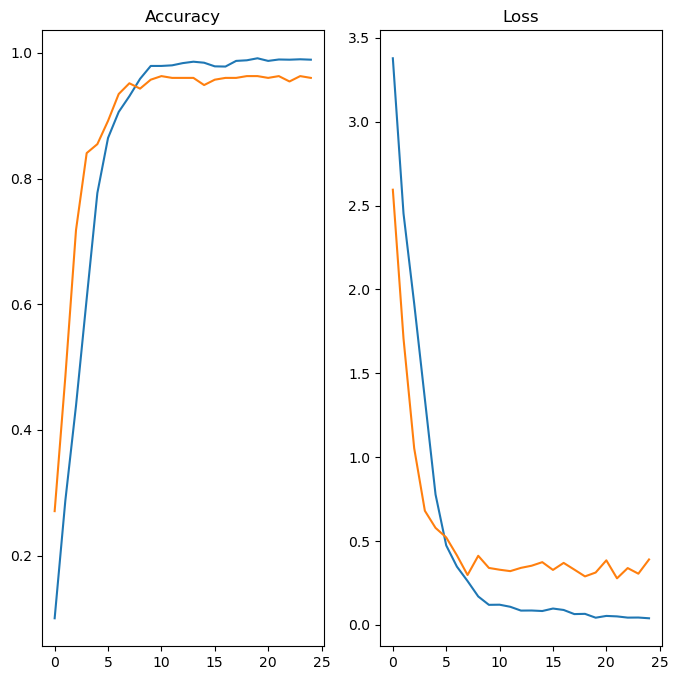

In [28]:
epochs_range = range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,history.history['accuracy'],label = 'Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'],label = 'Validation Accuracy')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label = 'Training Loss')
plt.plot(epochs_range, history.history['val_loss'],label = 'Validation Loss')
plt.title('Loss')

## Testing the model with an image

### Select and convert image to array

In [70]:
image = 'banana.jpg'
image = tf.keras.utils.load_img(image, target_size=(img_height,img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_bat=tf.expand_dims(img_arr,0)

### Make prediction

In [71]:
predict = model.predict(img_bat)

1/1 [==============================] - 0s 47ms/step


Find the score

In [72]:
score = tf.nn.softmax(predict)

### Print the outcome of prediction

In [74]:
print('Veg/Fruit in image is {} with accuracy of {:0.2f}'.format(data_cat[np.argmax(score)],np.max(score)*100))

Veg/Fruit in image is pomegranate with accuracy of 99.83


## Save the model

In [75]:
model.save('Image_classify.keras')